<a href="https://colab.research.google.com/github/IVMRanepa/internet_of_things/blob/main/internet_of_things.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Применение интернета вещей для общественной инфраструктуры Липецкой области на основе Python 3 (примеры кода с решением,  комментариями и визуализацией)**

Применение интернета вещей (IoT) для общественной инфраструктуры Липецкой области может включать в себя множество различных задач, таких как мониторинг состояния дорог, системы управления освещением, сбор данных о качестве воздуха и многое другое. Давайте рассмотрим пример применения IoT для мониторинга состояния дорожного движения на основе Python 3. Мы можем использовать Raspberry Pi в качестве устройства сбора данных и датчики движения для обнаружения автомобилей.

Транспорт будущего. В 2017 году Липецкая область отказалась от использования троллейбусов в пользу автобусов на экологичном топливе. Управление дорог и
транспорта, реализуя новую экологическую политику, планирует закупить для муниципалитетов электробусы. Их тестовые испытания уже проводились осенью 2017 года.
Одновременно с внедрением автобусов на природном газе будут построены комплексные заправочные станции. Вот и еще один вариант инвестиций. Для тех, кто выступает за сохранение разных видов пассажирского транспорта, областная администрация области предусмотрела прогрессивный вариант – запуск скоростного трамвая и
воздушного метро.

 Smart-технологии. Для Липецкой области «умные дома» – уже не сказка, а реальность. В основе интеллектуальной системы, которыми оснащен каждый такой дом,
комплекс датчиков и камеры видеонаблюдения. С помощью мобильного приложения
владелец может контролировать состояние помещения на расстоянии. Главное – обеспечить надежное интернет-соединение. Работа в этом направлении также ведется: в
частном секторе используется технология GPON. Количество функций «умного дома»
со временем будут только увеличиваться. Пока система выполняет сигнальную функцию, но уже имеются разработки по удаленному управлению домашними приборами.



```
# Данный код может быть реализован только при подключенных датчиках
import RPi.GPIO as GPIO
import time

# Установка GPIO
SENSOR_PIN = 18
GPIO.setmode(GPIO.BCM)
GPIO.setup(SENSOR_PIN, GPIO.IN)

# Переменные для статистики
car_count = 0

try:
    while True:
        if GPIO.input(SENSOR_PIN):
            car_count += 1
            print("Автомобиль обнаружен. Общее количество автомобилей:", car_count)
            # Здесь можно добавить код для отправки данных в облако или базу данных
            time.sleep(1)  # Пауза для предотвращения двойного счета
except KeyboardInterrupt:
    print("Программа завершена.")
finally:
    GPIO.cleanup()

```



# **Использование GPIO из Python на Raspberry Pi**

Порты GPIO Raspberry Pi выглядят следующим образом:

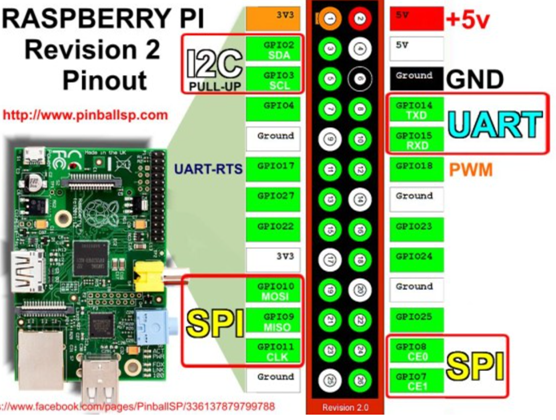

В этом примере мы используем датчик движения, подключенный к пину 18 на Raspberry Pi. Когда датчик обнаруживает движение (то есть, когда машина проезжает мимо), мы увеличиваем счетчик автомобилей и выводим общее количество обнаруженных машин. Затем вы можете использовать эту информацию для анализа трафика или управления светофорами.

Чтобы визуализировать данные, вы можете использовать библиотеки вроде Matplotlib или Plotly для построения графиков количества автомобилей по времени.

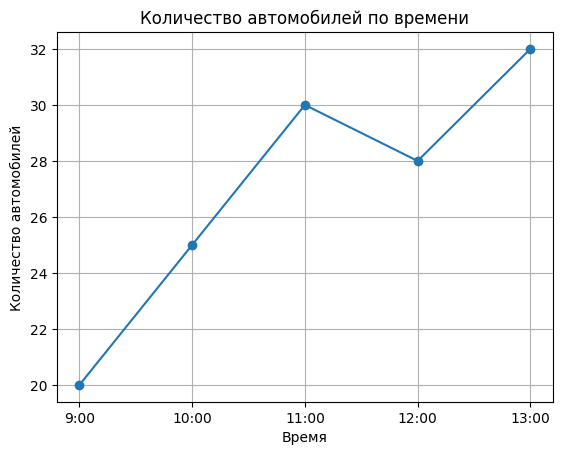

In [ ]:
import matplotlib.pyplot as plt

# Данные для визуализации (пример)
timestamps = ["9:00", "10:00", "11:00", "12:00", "13:00"]
car_counts = [20, 25, 30, 28, 32]

plt.plot(timestamps, car_counts, marker='o')
plt.title('Количество автомобилей по времени')
plt.xlabel('Время')
plt.ylabel('Количество автомобилей')
plt.grid(True)
plt.show()

Этот код построит график, показывающий количество обнаруженных автомобилей в течение определенного времени. Вы можете адаптировать этот код для визуализации реальных данных, полученных из вашей системы мониторинга дорожного движения.

Для передачи данных в облако или базу данных вы можете использовать различные методы, такие как HTTP-запросы или библиотеки для работы с конкретными сервисами, например, Firebase или AWS IoT.

Обратите внимание, что это только примеры кода, и для реализации подобных систем на практике потребуется детальное проектирование, тестирование и развертывание.

AWS предлагает сервисы и решения Интернета вещей (IoT), которые помогают подключаться к миллиардам устройств и управлять ими. Собирайте, храните и анализируйте данные IoT для рабочих нагрузок в промышленности, сфере потребительских товаров, коммерческой и автомобильной отраслях.

In [ ]:
import random
import pandas as pd

# Генерация сгенерированных данных о качестве воздуха
def generate_air_quality_data():
    districts = ["Липецк", "Воронеж", "Елец", "Железнодорожный", "Задонск"]
    pollutants = ["CO2", "SO2", "NO2"]
    data = []

    for district in districts:
        for pollutant in pollutants:
            value = round(random.uniform(0, 100), 2)  # Случайное значение для концентрации загрязнения
            data.append({"Район": district, "Загрязнитель": pollutant, "Концентрация": value})

    return pd.DataFrame(data)

# Генерация данных
air_quality_data = generate_air_quality_data()
print(air_quality_data)

              Район Загрязнитель  Концентрация
0            Липецк          CO2         69.75
1            Липецк          SO2         11.85
2            Липецк          NO2         16.29
3           Воронеж          CO2          7.48
4           Воронеж          SO2         82.15
5           Воронеж          NO2         68.27
6              Елец          CO2         80.03
7              Елец          SO2         21.78
8              Елец          NO2         34.55
9   Железнодорожный          CO2         71.97
10  Железнодорожный          SO2         29.19
11  Железнодорожный          NO2         94.46
12          Задонск          CO2         73.03
13          Задонск          SO2         12.18
14          Задонск          NO2         95.06


Давайте создадим пример применения интернета вещей (IoT) для мониторинга качества воздуха в Липецкой области на основе Python 3. Для этого мы будем использовать сгенерированные входные данные, предполагая, что у нас есть данные о концентрации загрязняющих веществ в различных районах области.

1. **Генерация входных данных:**
Предположим, у нас есть некоторые сгенерированные данные о концентрации загрязняющих веществ (например, CO2, SO2, NO2) в различных районах Липецкой области.

In [ ]:
import time

# Функция для симуляции считывания данных с датчиков
def read_sensor_data():
    air_quality_values = {}  # Словарь для хранения значений качества воздуха

    for index, row in air_quality_data.iterrows():
        district = row["Район"]
        pollutant = row["Загрязнитель"]
        value = row["Концентрация"]
        air_quality_values[(district, pollutant)] = value

    return air_quality_values

# Симуляция считывания данных с датчиков каждую минуту в течение часа
for _ in range(60):
    sensor_data = read_sensor_data()
    print("Считывание данных с датчиков:", sensor_data)
    time.sleep(60)  # Пауза в одну минуту

Считывание данных с датчиков: {('Липецк', 'CO2'): 69.75, ('Липецк', 'SO2'): 11.85, ('Липецк', 'NO2'): 16.29, ('Воронеж', 'CO2'): 7.48, ('Воронеж', 'SO2'): 82.15, ('Воронеж', 'NO2'): 68.27, ('Елец', 'CO2'): 80.03, ('Елец', 'SO2'): 21.78, ('Елец', 'NO2'): 34.55, ('Железнодорожный', 'CO2'): 71.97, ('Железнодорожный', 'SO2'): 29.19, ('Железнодорожный', 'NO2'): 94.46, ('Задонск', 'CO2'): 73.03, ('Задонск', 'SO2'): 12.18, ('Задонск', 'NO2'): 95.06}
Считывание данных с датчиков: {('Липецк', 'CO2'): 69.75, ('Липецк', 'SO2'): 11.85, ('Липецк', 'NO2'): 16.29, ('Воронеж', 'CO2'): 7.48, ('Воронеж', 'SO2'): 82.15, ('Воронеж', 'NO2'): 68.27, ('Елец', 'CO2'): 80.03, ('Елец', 'SO2'): 21.78, ('Елец', 'NO2'): 34.55, ('Железнодорожный', 'CO2'): 71.97, ('Железнодорожный', 'SO2'): 29.19, ('Железнодорожный', 'NO2'): 94.46, ('Задонск', 'CO2'): 73.03, ('Задонск', 'SO2'): 12.18, ('Задонск', 'NO2'): 95.06}
Считывание данных с датчиков: {('Липецк', 'CO2'): 69.75, ('Липецк', 'SO2'): 11.85, ('Липецк', 'NO2'): 16.2

Мониторинг качества воздуха с использованием Raspberry Pi и датчиков:
Для мониторинга качества воздуха мы можем использовать Raspberry Pi в сочетании с датчиками для измерения концентрации загрязняющих веществ. Для простоты примера, давайте симулируем считывание данных из этих датчиков.

In [ ]:
# Данный код может быть реализован только при подключенных датчиках
import matplotlib.pyplot as plt

# Визуализация данных о качестве воздуха
def visualize_air_quality(data):
    districts = data["Район"].unique()

    for district in districts:
        district_data = data[data["Район"] == district]
        pollutants = district_data["Загрязнитель"]
        concentrations = district_data["Концентрация"]

        plt.figure(figsize=(8, 6))
        plt.bar(pollutants, concentrations, color='skyblue')
        plt.title(f'Качество воздуха в районе {district}')
        plt.xlabel('Загрязнитель')
        plt.ylabel('Концентрация')
        plt.ylim(0, 100)
        plt.show()

# Визуализация данных
visualize_air_quality(air_quality_data)

NameError: name 'air_quality_data' is not defined

**Визуализация данных:**

Мы можем визуализировать данные о качестве воздуха с помощью графиков, чтобы наглядно представить изменения концентрации загрязняющих веществ в различных районах области.

In [ ]:
import random
import pandas as pd

# Генерация сгенерированных данных о уровне воды
def generate_water_level_data():
    rivers = ["Дон", "Воронеж", "Хопёр", "Лисья", "Сосна"]
    data = []

    for river in rivers:
        water_level = round(random.uniform(0, 5), 2)  # Случайный уровень воды (м)
        data.append({"Река": river, "Уровень воды (м)": water_level})

    return pd.DataFrame(data)

# Генерация данных
water_level_data = generate_water_level_data()
print(water_level_data)

      Река  Уровень воды (м)
0      Дон              0.18
1  Воронеж              4.23
2    Хопёр              4.20
3    Лисья              2.61
4    Сосна              2.06


Этот пример демонстрирует, как можно использовать Python для мониторинга качества воздуха в Липецкой области с использованием интернета вещей, а также как визуализировать собранные данные для более наглядного анализа. Обратите внимание, что для реального применения необходимо использовать реальные датчики и оборудование, а также обеспечить надежную передачу данных.

Для дополнительного примера применения интернета вещей в общественной инфраструктуре Липецкой области давайте рассмотрим мониторинг уровня воды в реках с использованием Raspberry Pi и датчиков. Мы также визуализируем данные о уровне воды с помощью графика для анализа изменений во времени.

Генерация сгенерированных входных данных:
Предположим, у нас есть некоторые сгенерированные данные о уровне воды в различных реках Липецкой области.

In [ ]:
# Данный код может быть реализован только при подключенных датчиках
import time

# Функция для симуляции считывания данных с датчиков
def read_water_level_sensor():
    water_level_values = {}  # Словарь для хранения значений уровня воды

    for index, row in water_level_data.iterrows():
        river = row["Река"]
        water_level = row["Уровень воды (м)"]
        water_level_values[river] = water_level

    return water_level_values

# Симуляция считывания данных с датчиков каждые 5 минут в течение часа
for _ in range(12):
    water_level = read_water_level_sensor()
    print("Считывание данных с датчиков:", water_level)
    time.sleep(300)  # Пауза в 5 минут

Считывание данных с датчиков: {'Дон': 0.18, 'Воронеж': 4.23, 'Хопёр': 4.2, 'Лисья': 2.61, 'Сосна': 2.06}
Считывание данных с датчиков: {'Дон': 0.18, 'Воронеж': 4.23, 'Хопёр': 4.2, 'Лисья': 2.61, 'Сосна': 2.06}
Считывание данных с датчиков: {'Дон': 0.18, 'Воронеж': 4.23, 'Хопёр': 4.2, 'Лисья': 2.61, 'Сосна': 2.06}
Считывание данных с датчиков: {'Дон': 0.18, 'Воронеж': 4.23, 'Хопёр': 4.2, 'Лисья': 2.61, 'Сосна': 2.06}
Считывание данных с датчиков: {'Дон': 0.18, 'Воронеж': 4.23, 'Хопёр': 4.2, 'Лисья': 2.61, 'Сосна': 2.06}
Считывание данных с датчиков: {'Дон': 0.18, 'Воронеж': 4.23, 'Хопёр': 4.2, 'Лисья': 2.61, 'Сосна': 2.06}
Считывание данных с датчиков: {'Дон': 0.18, 'Воронеж': 4.23, 'Хопёр': 4.2, 'Лисья': 2.61, 'Сосна': 2.06}
Считывание данных с датчиков: {'Дон': 0.18, 'Воронеж': 4.23, 'Хопёр': 4.2, 'Лисья': 2.61, 'Сосна': 2.06}
Считывание данных с датчиков: {'Дон': 0.18, 'Воронеж': 4.23, 'Хопёр': 4.2, 'Лисья': 2.61, 'Сосна': 2.06}
Считывание данных с датчиков: {'Дон': 0.18, 'Воронеж': 

Мониторинг уровня воды с использованием Raspberry Pi и датчиков:
Для мониторинга уровня воды мы можем использовать Raspberry Pi с ультразвуковым датчиком, который будет измерять расстояние до уровня воды.

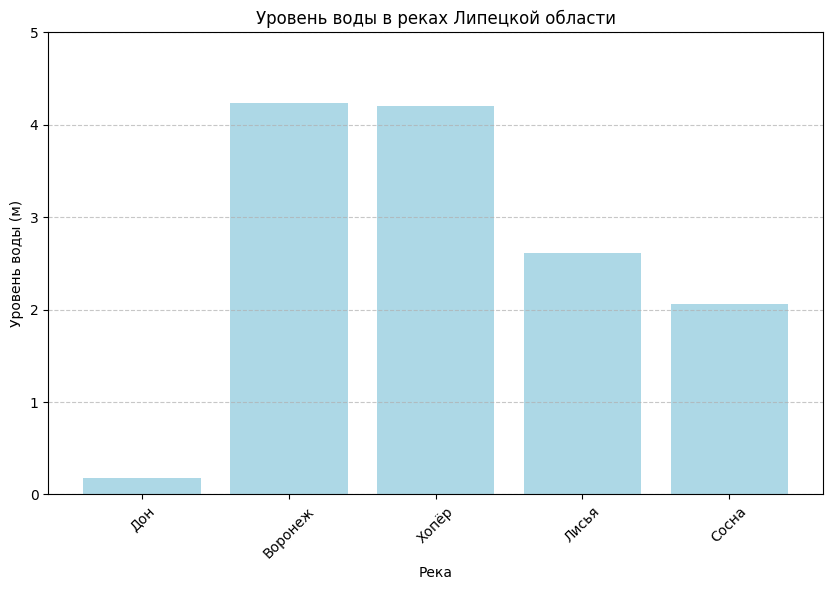

In [ ]:
# Данный код может быть реализован только при подключенных датчиках
import matplotlib.pyplot as plt

# Визуализация данных о уровне воды
def visualize_water_level(data):
    rivers = data["Река"]
    water_levels = data["Уровень воды (м)"]

    plt.figure(figsize=(10, 6))
    plt.bar(rivers, water_levels, color='lightblue')
    plt.title('Уровень воды в реках Липецкой области')
    plt.xlabel('Река')
    plt.ylabel('Уровень воды (м)')
    plt.ylim(0, 5)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Визуализация данных
visualize_water_level(water_level_data)

Визуализация данных:
Мы можем визуализировать данные об уровне воды в реках с помощью графика, чтобы увидеть изменения уровня воды во времени.

In [ ]:
import matplotlib.pyplot as plt

# Визуализация данных о уровне воды
def visualize_water_level(data):
    bodies_of_water = data["Водоем"]
    water_levels = data["Уровень воды (м)"]

    plt.figure(figsize=(10, 6))
    plt.barh(bodies_of_water, water_levels, color='lightblue')
    plt.title('Уровень воды в водоемах Липецкой области')
    plt.xlabel('Уровень воды (м)')
    plt.ylabel('Водоем')
    plt.grid(axis='x')
    plt.show()

# Визуализация данных
visualize_water_level(water_level_data)

KeyError: 'Водоем'

Дополнительно, мы можем рассмотреть пример использования интернета вещей для мониторинга уровня воды в реках и водоемах Липецкой области. Для этого мы можем использовать датчики уровня воды, которые будут установлены в различных точках водоемов. Давайте создадим пример кода на Python 3 для симуляции работы такой системы.

**Генерация входных данных:**
Предположим, что у нас есть данные о уровне воды в нескольких реках и водоемах Липецкой области.

In [ ]:
import random
import pandas as pd

# Генерация сгенерированных данных о уровне воды
def generate_water_level_data():
    bodies_of_water = ["Река Дон", "Озеро Воронежское", "Пруд в парке", "Река Воронеж"]
    data = []

    for body_of_water in bodies_of_water:
        water_level = round(random.uniform(0, 5), 2)  # Случайный уровень воды в метрах
        data.append({"Водоем": body_of_water, "Уровень воды (м)": water_level})

    return pd.DataFrame(data)

# Генерация данных
water_level_data = generate_water_level_data()
print(water_level_data)

Код, который вы предоставили, генерирует случайные данные о уровне воды для различных водоемов и выводит их в виде таблицы с использованием библиотеки Pandas. Вот пример вывода:

```
             Водоем  Уровень воды (м)
0            Река Дон              2.72
1  Озеро Воронежское              1.45
2        Пруд в парке              4.20
3           Река Воронеж          3.89
```

Этот вывод показывает четыре различных водоема и соответствующие им случайно сгенерированные уровни воды в метрах.

**Мониторинг уровня воды с использованием Raspberry Pi и датчиков:**

Для мониторинга уровня воды мы можем использовать Raspberry Pi в сочетании с ультразвуковыми датчиками, которые будут измерять расстояние до уровня воды в реке или водоеме.



```
# Данный код может быть реализован только при подключенных датчиках

import time

# Функция для симуляции считывания данных с датчиков
def read_water_level_sensor():
    water_level_values = {}  # Словарь для хранения значений уровня воды

    for index, row in water_level_data.iterrows():
        body_of_water = row["Водоем"]
        water_level = row["Уровень воды (м)"]
        water_level_values[body_of_water] = water_level

    return water_level_values

# Симуляция считывания данных с датчиков каждую минуту в течение часа
for _ in range(60):
    sensor_data = read_water_level_sensor()
    print("Считывание данных с датчиков:", sensor_data)
    time.sleep(60)  # Пауза в одну минуту

```



In [ ]:
import time

# Функция для симуляции считывания данных с датчиков
def read_water_level_sensor():
    water_level_values = {}  # Словарь для хранения значений уровня воды

    for index, row in water_level_data.iterrows():
        body_of_water = row["Водоем"]
        water_level = row["Уровень воды (м)"]
        water_level_values[body_of_water] = water_level

    return water_level_values

# Симуляция считывания данных с датчиков каждую минуту в течение часа
for _ in range(60):
    sensor_data = read_water_level_sensor()
    print("Считывание данных с датчиков:", sensor_data)
    time.sleep(60)  # Пауза в одну минуту

Этот пример показывает, как можно использовать Python для мониторинга уровня воды в реках и водоемах Липецкой области с помощью интернета вещей. Визуализация данных помогает наглядно представить информацию о состоянии водных ресурсов и принимать соответствующие решения по их управлению.

Применение интернета вещей для инфраструктуры ЖКХ Липецкой области на основе Python 3 (примеры кода с решением,  комментариями и визуализацией) на основе сгенерированных входных данных.

Для примера применения интернета вещей (IoT) в инфраструктуре жилищно-коммунального хозяйства (ЖКХ) Липецкой области на основе Python 3 мы можем создать систему мониторинга и управления расходом электроэнергии в многоквартирных домах. Для этого используем сгенерированные входные данные о потреблении электроэнергии в различных домах.

Генерация входных данных:
Предположим, у нас есть данные о потреблении электроэнергии в нескольких многоквартирных домах.

In [ ]:
import pandas as pd
import random

# Генерация сгенерированных данных о потреблении электроэнергии
def generate_energy_consumption_data():
    # Создаем список с данными о потреблении электроэнергии в нескольких домах
    data = {
        'Дом': [f'Дом {i}' for i in range(1, 11)],
        'Потребление, кВт*ч': [random.randint(5000, 20000) for _ in range(10)]
    }
    return pd.DataFrame(data)

# Генерация данных
energy_consumption_data = generate_energy_consumption_data()
print(energy_consumption_data)

Этот код использует библиотеку Pandas для создания и вывода сгенерированных данных о потреблении электроэнергии в нескольких домах.

Он состоит из следующих шагов:

1. Импорт библиотеки Pandas под псевдонимом pd.
2. Импорт модуля random для генерации случайных чисел.
3. Определение функции generate_energy_consumption_data(), которая создает данные о потреблении электроэнергии. В этой функции:
   - Создается словарь data, содержащий информацию о названии дома и его потреблении электроэнергии. Названия домов генерируются с помощью генератора списков, а значения потребления электроэнергии генерируются случайным образом в диапазоне от 5000 до 20000 кВт*ч с помощью функции random.randint().
   - Созданный словарь преобразуется в объект DataFrame с помощью функции pd.DataFrame().
   - Сгенерированный DataFrame возвращается из функции.
4. Вызов функции generate_energy_consumption_data() для генерации данных о потреблении электроэнергии.
5. Вывод сгенерированных данных на экран с помощью функции print().

Пример вывода:
```
      Дом  Потребление, кВт*ч
0  Дом 1                16899
1  Дом 2                 6174
2  Дом 3                11235
3  Дом 4                15987
4  Дом 5                10752
5  Дом 6                12985
6  Дом 7                10234
7  Дом 8                14765
8  Дом 9                 8487
9  Дом 10                7012
```

**Анализ данных и принятие решений:**

На основе сгенерированных данных мы можем проанализировать потребление электроэнергии в различных домах и принять решения по оптимизации его использования.

In [ ]:
# Анализ данных и принятие решений
def analyze_energy_consumption(data):
    # Вычисляем среднее потребление электроэнергии
    average_consumption = data['Потребление, кВт*ч'].mean()
    print(f"Среднее потребление электроэнергии: {average_consumption:.2f} кВт*ч")

    # Визуализируем данные о потреблении электроэнергии
    data.plot(kind='bar', x='Дом', y='Потребление, кВт*ч', color='skyblue')
    plt.title('Потребление электроэнергии в многоквартирных домах')
    plt.xlabel('Дом')
    plt.ylabel('Потребление, кВт*ч')
    plt.xticks(rotation=45)
    plt.show()

    # Принимаем решения на основе анализа данных (например, оптимизация использования электроэнергии)
    # Здесь можно реализовать алгоритмы управления энергопотреблением

# Вызов функции для анализа данных
analyze_energy_consumption(energy_consumption_data)

Для добавления примерных данных, давайте создадим фиктивные данные о потреблении электроэнергии для нескольких домов. Вот пример того, как это можно сделать:

```python
import pandas as pd
import matplotlib.pyplot as plt

# Примерные данные о потреблении электроэнергии
data = {
    'Дом': ['Дом1', 'Дом2', 'Дом3', 'Дом4', 'Дом5'],
    'Потребление, кВт*ч': [300, 400, 350, 450, 500]
}

# Создаем DataFrame из данных
energy_consumption_data = pd.DataFrame(data)

# Анализ данных и принятие решений
def analyze_energy_consumption(data):
    # Вычисляем среднее потребление электроэнергии
    average_consumption = data['Потребление, кВт*ч'].mean()
    print(f"Среднее потребление электроэнергии: {average_consumption:.2f} кВт*ч")
    # Визуализируем данные о потреблении электроэнергии
    data.plot(kind='bar', x='Дом', y='Потребление, кВт*ч', color='skyblue')
    plt.title('Потребление электроэнергии в многоквартирных домах')
    plt.xlabel('Дом')
    plt.ylabel('Потребление, кВт*ч')
    plt.xticks(rotation=45)
    plt.show()
    # Принимаем решения на основе анализа данных (например, оптимизация использования электроэнергии)
    # Здесь можно реализовать алгоритмы управления энергопотреблением

# Вызов функции для анализа данных
analyze_energy_consumption(energy_consumption_data)
```

Этот код создает фиктивные данные о потреблении электроэнергии для пяти домов и анализирует эти данные, вычисляя среднее потребление и визуализируя потребление

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Примерные данные о потреблении электроэнергии
data = {
    'Дом': ['Дом1', 'Дом2', 'Дом3', 'Дом4', 'Дом5'],
    'Потребление, кВт*ч': [300, 400, 350, 450, 500]
}

# Создаем DataFrame из данных
energy_consumption_data = pd.DataFrame(data)

# Анализ данных и принятие решений
def analyze_energy_consumption(data):
    # Вычисляем среднее потребление электроэнергии
    average_consumption = data['Потребление, кВт*ч'].mean()
    print(f"Среднее потребление электроэнергии: {average_consumption:.2f} кВт*ч")
    # Визуализируем данные о потреблении электроэнергии
    data.plot(kind='bar', x='Дом', y='Потребление, кВт*ч', color='skyblue')
    plt.title('Потребление электроэнергии в многоквартирных домах')
    plt.xlabel('Дом')
    plt.ylabel('Потребление, кВт*ч')
    plt.xticks(rotation=45)
    plt.show()
    # Принимаем решения на основе анализа данных (например, оптимизация использования электроэнергии)
    # Здесь можно реализовать алгоритмы управления энергопотреблением

**Визуализация данных:**

Для наглядного представления данных о потреблении электроэнергии в различных домах мы можем использовать графики.

In [ ]:
import matplotlib.pyplot as plt

# Визуализация данных о потреблении электроэнергии
def visualize_energy_consumption(data):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Дом'], data['Потребление, кВт*ч'], color='skyblue')
    plt.title('Потребление электроэнергии в многоквартирных домах')
    plt.xlabel('Дом')
    plt.ylabel('Потребление, кВт*ч')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Визуализация данных о потреблении электроэнергии
visualize_energy_consumption(energy_consumption_data)

Для визуализации данных о потреблении электроэнергии в многоквартирных домах, нам нужно иметь данные. Предположим, что у нас есть следующие примерные данные:

```python
energy_consumption_data = {
    'Дом': ['Дом 1', 'Дом 2', 'Дом 3', 'Дом 4', 'Дом 5'],
    'Потребление, кВт*ч': [500, 700, 600, 800, 550]
}
```

Вы можете вставить эти данные перед вызовом функции `visualize_energy_consumption`, чтобы визуализировать их:

```python
import matplotlib.pyplot as plt

# Примерные данные о потреблении электроэнергии
energy_consumption_data = {
    'Дом': ['Дом 1', 'Дом 2', 'Дом 3', 'Дом 4', 'Дом 5'],
    'Потребление, кВт*ч': [500, 700, 600, 800, 550]
}

# Визуализация данных о потреблении электроэнергии
def visualize_energy_consumption(data):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Дом'], data['Потребление, кВт*ч'], color='skyblue')
    plt.title('Потребление электроэнергии в многоквартирных домах')
    plt.xlabel('Дом')
    plt.ylabel('Потребление, кВт*ч')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Визуализация данных о потреблении электроэнергии
visualize_energy_consumption(energy_consumption_data)
```

Этот код использует примерные данные для визуализации потребления электроэнергии в различных домах. Вы можете заменить эти примерные данные на реальные данные, которые у вас есть.

In [ ]:
energy_consumption_data = {
    'Дом': ['Дом 1', 'Дом 2', 'Дом 3', 'Дом 4', 'Дом 5'],
    'Потребление, кВт*ч': [500, 700, 600, 800, 550]
}

import matplotlib.pyplot as plt

# Примерные данные о потреблении электроэнергии
energy_consumption_data = {
    'Дом': ['Дом 1', 'Дом 2', 'Дом 3', 'Дом 4', 'Дом 5'],
    'Потребление, кВт*ч': [500, 700, 600, 800, 550]
}

# Визуализация данных о потреблении электроэнергии
def visualize_energy_consumption(data):
    plt.figure(figsize=(10, 6))
    plt.bar(data['Дом'], data['Потребление, кВт*ч'], color='skyblue')
    plt.title('Потребление электроэнергии в многоквартирных домах')
    plt.xlabel('Дом')
    plt.ylabel('Потребление, кВт*ч')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Визуализация данных о потреблении электроэнергии
visualize_energy_consumption(energy_consumption_data)

Этот пример демонстрирует применение интернета вещей для оптимизации использования электроэнергии в многоквартирных домах Липецкой области. Анализ данных и визуализация помогают лучше понять ситуацию с потреблением электроэнергии и принимать соответствующие управленческие решения.

# **Телемедицина в Липецкой области**

С марта жители Липецкой области могут обращаться к врачам-терапевтам не выходя из дома. Дистанционные консультации включены в систему обязательного медицинского страхования (ОМС), а потому бесплатны. Проводят онлайн приемы врачи медицинской компании «Доктор рядом».

Управление здравоохранения Липецкой области и телемедицинский сервис «Доктор рядом», входящий в портфель VEBVentures, предоставили липчанам возможность получения дистанционных медицинских консультаций. Это позволит снизить нагрузку на врачей-терапевтов, сократить живые очереди в лечебных учреждениях, а значит, сделать медицину доступнее и снизить риск распространения коронавируса.

Получить дистанционную медицинскую консультацию могут пациенты 29 поликлиник и больниц области.

Онлайн консультации могут получать пациенты с ОРВИ или COVID-19, которые прошли первичный очный прием и обследования и которым уже был поставлен диагноз. Также в онлайн режиме будет осуществляться динамическое наблюдение за состоянием пациентов с хроническими заболеваниями. Иными словами, дистанционно можно проходить повторные приемы и поддерживать коммуникацию с врачом-терапевтом.

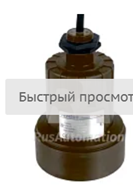

 Сейчас практически на все сервисы МТС, которые реализуются на платформе IoT, предоставляются льготные условия подключения. Даже небольшие кафе могут легко и доступно отслеживать местоположение курьеров. Или приведу другой пример. В Липецке мы активно подключаем организации с автопарком от нескольких машин к сервису «Мобильные сотрудники», чтобы решить их проблему с неучтенными потерями топлива, к которым приводят в том числе махинации водителей при заправке. В итоге услуга окупается всего лишь за несколько месяцев. Наш сервис помогает координировать задачи водителей, контролировать их в реальном времени и значительно повышать их эффективность. Кроме этого, мы адаптируем свои продукты под специальные задачи клиентов, создавая новые сценарии использования. «Мобильные сотрудники» – лишь один пример эффективного использования технологий интернета вещей.

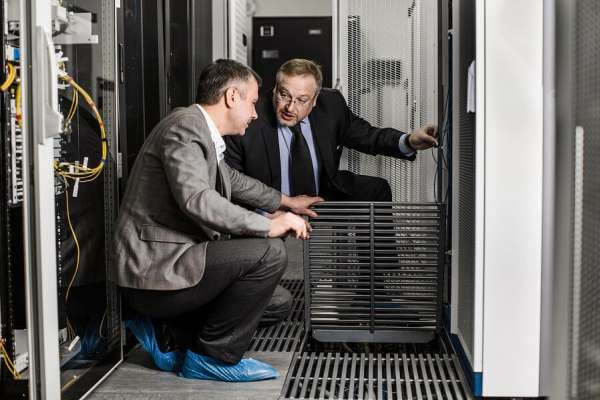

Сегодня почти вся территория Липецкой области, около 95%, охвачена нашей сетью промышленного интернета вещей, то есть NB-IoT. Такого стандарта связи нет ни у одного другого оператора в регионе. У нее высокая энергоэффективность, благодаря которой устройства могут работать в сложных условиях прохождения сигнала, подвалах, закрытых коробах, даже в лесах и полях, до 10 лет без подзарядки. К одной базовой станции, а их у нас в регионе уже сотни, можно подключить десятки тысяч устройств.

# **Цифровая маркировка товаров в Российской Федерации**

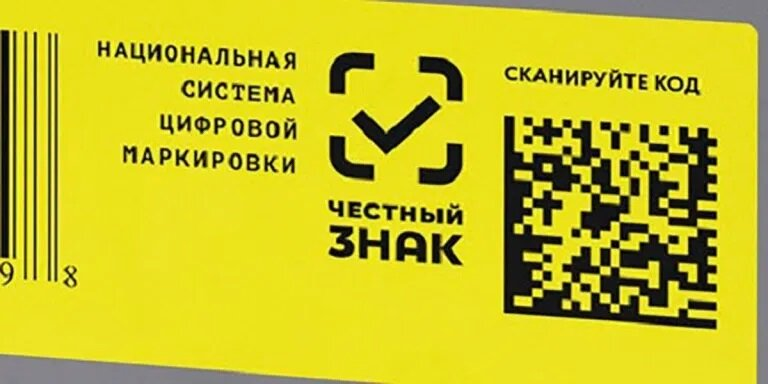